<a href="https://colab.research.google.com/github/maeliech/BigDataPhysics/blob/main/week6_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6 report:
## fish.txt

**Question 1:**

To find the optimal values of a and b for the function f(x) = a + bx, where a = ln(A) and b = ln(L), we start by taking the partial derivatives of f(x) depending on a and b, and then try to find the critical points.

Partial derivation of f(x) by a:
∂f(x)/∂a = a' + (bx)' = (ln(A))' = 1

Partial derivation of f(x) by b:
∂f(x)/∂b = a' + (bx)' = (bx)' = 1 * x = ln(L)

We look for ∂f(x)/∂a = 0 and we get 1 = 0, which is impossible. There is no critical point for a.

We then look for ∂f(x)/∂b = 0, we get x = 0, which implies that the critical point depending on b is x = 0.

Now, let's substitute a = ln(A) and b = ln(L) back into the original function f(x) = a + bx:

f(x) = ln(A) + ln(L)b

Since x = 0 is the critical point depending on b, we can substitute x = 0 into the function to find the optimal value of a:

f(0) = ln(A) + ln(L) * 0
f(0) = ln(A)

We find that the optimal value of a is ln(A).

In conclusion, the optimal values of a and b for the function f(x) = a + bx are ln(A) and ln(L) respectively.

**Question 2:**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fish = pd.read_csv('/content/fish.txt', sep='\t') #renaming columns and separating them using the space character
fish

,Code_ID,Stream,Location,Family,Genus,Species,Scientific_name,Length_mm,Mass_g
0,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,442,1700.0
1,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,405,1220.0
2,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,373,1040.0
3,1,Ebro,Miranda de Ebro,Cyprinidae,Cyprinus,carpio,Cyprinus carpio,199,139.9
4,1,Ebro,Miranda de Ebro,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,225,133.0
...,...,...,...,...,...,...,...,...,...
12283,118,Ebro,Batea,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,79,6.9
12284,118,Ebro,Batea,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,79,7.4
12285,118,Ebro,Batea,Cyprinidae,Luciobarbus,graellsii,Luciobarbus graellsii,110,19.8
12286,118,Ebro,Batea,Cyprinidae,Parachondrostoma,miegii,Parachondrostoma miegii,63,2.8


In [25]:
print(fish.isna().sum())

Code_ID            0
Stream             0
Location           0
Family             0
Genus              0
Species            0
Scientific_name    0
Length_mm          0
Mass_g             0
dtype: int64


We check the values are ok

In [26]:
weight = fish['Mass_g']
length = fish['Length_mm']

Selecting the wanted values, weight and length

In [27]:
#ln:
a = np.log10(weight)
b = np.log10(length)
M = a+b

We compute the logarithms of the weight and length in accordance with the subject



In [28]:
array=[]
def fun(x):
  return a + b*x

for i in range(10):
  array.append(fun(i))

Our subject can be translated into a function f as shown above

In [29]:
slope=(np.mean(a*b)-np.mean(a)*np.mean(b))/np.std(a)**2
intercept=(np.mean(a*a)*np.mean(b)-np.mean(a*b)*np.mean(a))/np.std(a)**2
print(slope,intercept)

0.31215406974177434 1.6641423717371753


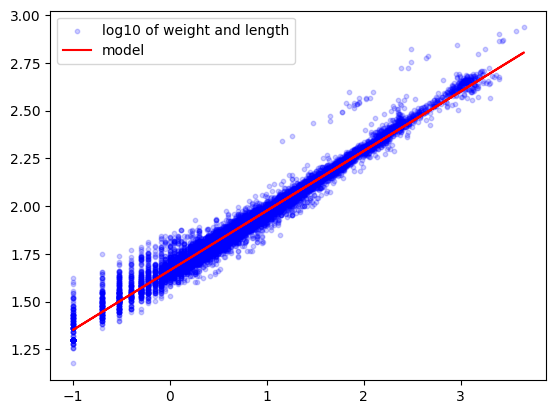

In [30]:
model=lambda a:a*slope+intercept # defining linear model

plt.scatter(a,b,label='log10 of weight and length',s=10,alpha=0.2,c='b') #displaying the relations between weight and length
plt.plot(a,model(a),label='model',c='r')
plt.legend()

In [31]:
from scipy.stats import linregress # scipy module from labs
linregress(a,b)

LinregressResult(slope=0.31215406974177495, intercept=1.6641423717371753, rvalue=0.9862089334727002, pvalue=0.0, stderr=0.00047261359036380654, intercept_stderr=0.0005336345530059875)

In [32]:
x=a
y=b

In [33]:
def MSE(x,y,slope,intercept):
  y_model=x*slope+intercept
  return np.mean((y-y_model)**2)

def dEda(x,y,slope,intercept,delta=0.0001):
  return (MSE(x,y,slope+delta/2,intercept)-MSE(x,y,slope-delta/2,intercept))/delta

def dEdb(x,y,slope,intercept,delta=0.0001):
  return (MSE(x,y,slope,intercept+delta/2)-MSE(x,y,slope,intercept-delta/2))/delta

def Gradient(x,y,epsilon=0.00001,c=0.02):
  slope,intercept=2,2
  slope_next,intercept_next=np.random.random(2)

  while abs(slope_next-slope)>epsilon or abs(intercept_next-intercept)>epsilon:
    slope,intercept = slope_next,intercept_next
    slope_next=slope - c*dEda(x,y,slope,intercept)
    intercept_next=intercept - c*dEdb(x,y,slope,intercept)
  return slope,intercept

We follow the methods seen in class during our labs.

In [34]:
Gradient(x,y)

(0.3128262761905804, 1.6633467825434538)

The values obtained by different methods are very close.